## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 100 # IF you feel too long to finish, try to make it smaller
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5, 0.1]
redice_lr_patient = [5, 10, 20]

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 16)                528       
_________________________________________________________________
batch_normalizatio

Epoch 47/100
50000/50000 [==============================] - 2s 50us/step - loss: 1.3187 - acc: 0.5283 - val_loss: 1.5130 - val_acc: 0.4659
Epoch 48/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.3152 - acc: 0.5302 - val_loss: 1.5106 - val_acc: 0.4653
Epoch 49/100
50000/50000 [==============================] - 2s 49us/step - loss: 1.3128 - acc: 0.5295 - val_loss: 1.5131 - val_acc: 0.4649
Epoch 50/100
50000/50000 [==============================] - 2s 49us/step - loss: 1.3090 - acc: 0.5324 - val_loss: 1.5168 - val_acc: 0.4584
Epoch 51/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.3074 - acc: 0.5328 - val_loss: 1.5173 - val_acc: 0.4640
Epoch 52/100
50000/50000 [==============================] - 2s 49us/step - loss: 1.3038 - acc: 0.5334 - val_loss: 1.5198 - val_acc: 0.4608
Epoch 53/100
50000/50000 [==============================] - 2s 50us/step - loss: 1.3006 - acc: 0.5339 - val_loss: 1.5108 - val_acc: 0.4658

Epoch 00053: ReduceLROnPla

50000/50000 [==============================] - 3s 55us/step - loss: 1.2635 - acc: 0.5464 - val_loss: 1.5079 - val_acc: 0.4665
Numbers of exp: 1, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                196672    
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
hidden_layer3 (Dense)  

50000/50000 [==============================] - 3s 53us/step - loss: 2.5813 - acc: 0.1503 - val_loss: 2.5930 - val_acc: 0.1465
Epoch 49/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.5781 - acc: 0.1504 - val_loss: 2.5898 - val_acc: 0.1474
Epoch 50/100
50000/50000 [==============================] - 4s 74us/step - loss: 2.5742 - acc: 0.1509 - val_loss: 2.5870 - val_acc: 0.1471
Epoch 51/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.5714 - acc: 0.1522 - val_loss: 2.5836 - val_acc: 0.1485
Epoch 52/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.5680 - acc: 0.1525 - val_loss: 2.5811 - val_acc: 0.1491
Epoch 53/100
50000/50000 [==============================] - 4s 76us/step - loss: 2.5647 - acc: 0.1530 - val_loss: 2.5779 - val_acc: 0.1498
Epoch 54/100
50000/50000 [==============================] - 3s 66us/step - loss: 2.5630 - acc: 0.1546 - val_loss: 2.5755 - val_acc: 0.1511
Epoch 55/100
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 78us/step - loss: 2.7222 - acc: 0.1211 - val_loss: 2.7389 - val_acc: 0.1171
Epoch 2/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7138 - acc: 0.1224 - val_loss: 2.7298 - val_acc: 0.1198
Epoch 3/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7041 - acc: 0.1235 - val_loss: 2.7227 - val_acc: 0.1213
Epoch 4/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.6954 - acc: 0.1264 - val_loss: 2.7143 - val_acc: 0.1223
Epoch 5/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6867 - acc: 0.1265 - val_loss: 2.7060 - val_acc: 0.1244
Epoch 6/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.6789 - acc: 0.1268 - val_loss: 2.6978 - val_acc: 0.1262
Epoch 7/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.6717 - acc: 0.1287 - val_loss: 2.6897 - 

50000/50000 [==============================] - 3s 60us/step - loss: 2.4383 - acc: 0.1823 - val_loss: 2.4394 - val_acc: 0.1837
Epoch 60/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.4354 - acc: 0.1818 - val_loss: 2.4366 - val_acc: 0.1841
Epoch 61/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.4331 - acc: 0.1834 - val_loss: 2.4335 - val_acc: 0.1852
Epoch 62/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.4297 - acc: 0.1837 - val_loss: 2.4310 - val_acc: 0.1860
Epoch 63/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.4276 - acc: 0.1845 - val_loss: 2.4282 - val_acc: 0.1869
Epoch 64/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.4250 - acc: 0.1857 - val_loss: 2.4257 - val_acc: 0.1882
Epoch 65/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.4217 - acc: 0.1865 - val_loss: 2.4229 - val_acc: 0.1892
Epoch 66/100
50000/50000 [==============

50000/50000 [==============================] - 3s 60us/step - loss: 2.6938 - acc: 0.1307 - val_loss: 2.6953 - val_acc: 0.1267
Epoch 8/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.6802 - acc: 0.1321 - val_loss: 2.6846 - val_acc: 0.1308
Epoch 9/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6693 - acc: 0.1349 - val_loss: 2.6734 - val_acc: 0.1332
Epoch 10/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6577 - acc: 0.1364 - val_loss: 2.6617 - val_acc: 0.1357
Epoch 11/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6469 - acc: 0.1385 - val_loss: 2.6506 - val_acc: 0.1378
Epoch 12/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6371 - acc: 0.1421 - val_loss: 2.6406 - val_acc: 0.1391
Epoch 13/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.6271 - acc: 0.1429 - val_loss: 2.6307 - val_acc: 0.1413
Epoch 14/100
50000/50000 [================

50000/50000 [==============================] - 3s 62us/step - loss: 2.3806 - acc: 0.1997 - val_loss: 2.3742 - val_acc: 0.2014
Epoch 67/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.3784 - acc: 0.1990 - val_loss: 2.3720 - val_acc: 0.2023
Epoch 68/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.3768 - acc: 0.2002 - val_loss: 2.3695 - val_acc: 0.2019
Epoch 69/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.3746 - acc: 0.2004 - val_loss: 2.3670 - val_acc: 0.2024
Epoch 70/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.3718 - acc: 0.2013 - val_loss: 2.3648 - val_acc: 0.2032
Epoch 71/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.3699 - acc: 0.2018 - val_loss: 2.3626 - val_acc: 0.2033
Epoch 72/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.3671 - acc: 0.2020 - val_loss: 2.3601 - val_acc: 0.2040
Epoch 73/100
50000/50000 [==============

50000/50000 [==============================] - 3s 63us/step - loss: 2.6632 - acc: 0.1197 - val_loss: 2.6445 - val_acc: 0.1268
Epoch 15/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6580 - acc: 0.1203 - val_loss: 2.6396 - val_acc: 0.1270
Epoch 16/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6533 - acc: 0.1224 - val_loss: 2.6348 - val_acc: 0.1278
Epoch 17/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6481 - acc: 0.1224 - val_loss: 2.6298 - val_acc: 0.1271
Epoch 18/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6435 - acc: 0.1226 - val_loss: 2.6250 - val_acc: 0.1286
Epoch 19/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6375 - acc: 0.1242 - val_loss: 2.6205 - val_acc: 0.1279
Epoch 20/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6332 - acc: 0.1238 - val_loss: 2.6160 - val_acc: 0.1291
Epoch 21/100
50000/50000 [==============

50000/50000 [==============================] - 3s 60us/step - loss: 2.4766 - acc: 0.1548 - val_loss: 2.4810 - val_acc: 0.1536
Epoch 74/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.4757 - acc: 0.1545 - val_loss: 2.4794 - val_acc: 0.1540
Epoch 75/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.4737 - acc: 0.1553 - val_loss: 2.4781 - val_acc: 0.1553
Epoch 76/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.4714 - acc: 0.1555 - val_loss: 2.4763 - val_acc: 0.1554
Epoch 77/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.4708 - acc: 0.1563 - val_loss: 2.4750 - val_acc: 0.1558
Epoch 78/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.4682 - acc: 0.1558 - val_loss: 2.4734 - val_acc: 0.1561
Epoch 79/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.4674 - acc: 0.1570 - val_loss: 2.4718 - val_acc: 0.1565
Epoch 80/100
50000/50000 [==============

50000/50000 [==============================] - 3s 64us/step - loss: 2.6258 - acc: 0.1255 - val_loss: 2.6250 - val_acc: 0.1275
Epoch 22/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.6194 - acc: 0.1268 - val_loss: 2.6188 - val_acc: 0.1282
Epoch 23/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6116 - acc: 0.1274 - val_loss: 2.6128 - val_acc: 0.1284
Epoch 24/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6051 - acc: 0.1284 - val_loss: 2.6070 - val_acc: 0.1293
Epoch 25/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.5985 - acc: 0.1299 - val_loss: 2.6011 - val_acc: 0.1302
Epoch 26/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.5913 - acc: 0.1307 - val_loss: 2.5951 - val_acc: 0.1320
Epoch 27/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.5857 - acc: 0.1311 - val_loss: 2.5896 - val_acc: 0.1336
Epoch 28/100
50000/50000 [==============

50000/50000 [==============================] - 3s 67us/step - loss: 2.3943 - acc: 0.1735 - val_loss: 2.4039 - val_acc: 0.1733
Epoch 81/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.3922 - acc: 0.1725 - val_loss: 2.4011 - val_acc: 0.1742
Epoch 82/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.3898 - acc: 0.1740 - val_loss: 2.3987 - val_acc: 0.1746
Epoch 83/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.3869 - acc: 0.1745 - val_loss: 2.3964 - val_acc: 0.1751
Epoch 84/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.3849 - acc: 0.1752 - val_loss: 2.3939 - val_acc: 0.1757
Epoch 85/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.3827 - acc: 0.1757 - val_loss: 2.3915 - val_acc: 0.1748
Epoch 86/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.3805 - acc: 0.1768 - val_loss: 2.3891 - val_acc: 0.1754
Epoch 87/100
50000/50000 [==============

50000/50000 [==============================] - 3s 54us/step - loss: 1.2254 - acc: 0.5703 - val_loss: 1.5192 - val_acc: 0.4705
Epoch 27/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.2243 - acc: 0.5698 - val_loss: 1.5160 - val_acc: 0.4683
Epoch 28/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.2219 - acc: 0.5714 - val_loss: 1.5193 - val_acc: 0.4664 1s - loss: 1
Epoch 29/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.2180 - acc: 0.5738 - val_loss: 1.5442 - val_acc: 0.4637

Epoch 00029: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 30/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.2087 - acc: 0.5766 - val_loss: 1.5042 - val_acc: 0.4728
Epoch 31/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.2061 - acc: 0.5761 - val_loss: 1.5096 - val_acc: 0.4753
Epoch 32/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.204

50000/50000 [==============================] - 3s 63us/step - loss: 1.1841 - acc: 0.5852 - val_loss: 1.5099 - val_acc: 0.4761
Epoch 80/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.1838 - acc: 0.5846 - val_loss: 1.5099 - val_acc: 0.4762

Epoch 00080: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.
Epoch 81/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.1841 - acc: 0.5850 - val_loss: 1.5099 - val_acc: 0.4761
Epoch 82/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.1842 - acc: 0.5851 - val_loss: 1.5099 - val_acc: 0.4761
Epoch 83/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.1852 - acc: 0.5839 - val_loss: 1.5099 - val_acc: 0.4762
Epoch 84/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.1846 - acc: 0.5848 - val_loss: 1.5098 - val_acc: 0.4762
Epoch 85/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.1850 - acc: 0.5

50000/50000 [==============================] - 3s 57us/step - loss: 2.7595 - acc: 0.1102 - val_loss: 2.7489 - val_acc: 0.1062
Epoch 25/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.7592 - acc: 0.1101 - val_loss: 2.7487 - val_acc: 0.1062
Epoch 26/100
50000/50000 [==============================] - 3s 55us/step - loss: 2.7594 - acc: 0.1110 - val_loss: 2.7485 - val_acc: 0.1063
Epoch 27/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7598 - acc: 0.1105 - val_loss: 2.7485 - val_acc: 0.1063
Epoch 28/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.7588 - acc: 0.1108 - val_loss: 2.7482 - val_acc: 0.1060
Epoch 29/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7584 - acc: 0.1111 - val_loss: 2.7478 - val_acc: 0.1060
Epoch 30/100
50000/50000 [==============================] - 3s 68us/step - loss: 2.7592 - acc: 0.1108 - val_loss: 2.7479 - val_acc: 0.1062
Epoch 31/100
50000/50000 [==============

50000/50000 [==============================] - 3s 57us/step - loss: 2.7505 - acc: 0.1122 - val_loss: 2.7397 - val_acc: 0.1074
Epoch 84/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.7503 - acc: 0.1121 - val_loss: 2.7397 - val_acc: 0.1073
Epoch 85/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7501 - acc: 0.1114 - val_loss: 2.7396 - val_acc: 0.1074
Epoch 86/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.7499 - acc: 0.1130 - val_loss: 2.7393 - val_acc: 0.1073
Epoch 87/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7508 - acc: 0.1118 - val_loss: 2.7392 - val_acc: 0.1075
Epoch 88/100
50000/50000 [==============================] - 3s 69us/step - loss: 2.7493 - acc: 0.1123 - val_loss: 2.7389 - val_acc: 0.1074
Epoch 89/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.7490 - acc: 0.1113 - val_loss: 2.7384 - val_acc: 0.1075
Epoch 90/100
50000/50000 [==============

50000/50000 [==============================] - 3s 59us/step - loss: 2.7658 - acc: 0.0929 - val_loss: 2.7412 - val_acc: 0.0935
Epoch 32/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.7662 - acc: 0.0932 - val_loss: 2.7412 - val_acc: 0.0936
Epoch 33/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.7647 - acc: 0.0930 - val_loss: 2.7409 - val_acc: 0.0938
Epoch 34/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.7654 - acc: 0.0928 - val_loss: 2.7407 - val_acc: 0.0940
Epoch 35/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7660 - acc: 0.0924 - val_loss: 2.7405 - val_acc: 0.0937
Epoch 36/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.7655 - acc: 0.0926 - val_loss: 2.7404 - val_acc: 0.0939
Epoch 37/100
50000/50000 [==============================] - 3s 64us/step - loss: 2.7653 - acc: 0.0929 - val_loss: 2.7401 - val_acc: 0.0940
Epoch 38/100
50000/50000 [==============

50000/50000 [==============================] - 3s 56us/step - loss: 2.7576 - acc: 0.0935 - val_loss: 2.7330 - val_acc: 0.0947
Epoch 91/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7576 - acc: 0.0934 - val_loss: 2.7329 - val_acc: 0.0947
Epoch 92/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.7576 - acc: 0.0937 - val_loss: 2.7328 - val_acc: 0.0949
Epoch 93/100
50000/50000 [==============================] - 3s 55us/step - loss: 2.7572 - acc: 0.0934 - val_loss: 2.7328 - val_acc: 0.0949
Epoch 94/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.7576 - acc: 0.0944 - val_loss: 2.7327 - val_acc: 0.0949
Epoch 95/100
50000/50000 [==============================] - 3s 66us/step - loss: 2.7570 - acc: 0.0942 - val_loss: 2.7325 - val_acc: 0.0949
Epoch 96/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.7569 - acc: 0.0942 - val_loss: 2.7323 - val_acc: 0.0951
Epoch 97/100
50000/50000 [==============

50000/50000 [==============================] - 3s 56us/step - loss: 2.8383 - acc: 0.0881 - val_loss: 2.8356 - val_acc: 0.0925
Epoch 39/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.8369 - acc: 0.0895 - val_loss: 2.8355 - val_acc: 0.0924
Epoch 40/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.8372 - acc: 0.0885 - val_loss: 2.8354 - val_acc: 0.0925
Epoch 41/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.8377 - acc: 0.0882 - val_loss: 2.8351 - val_acc: 0.0924
Epoch 42/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.8366 - acc: 0.0889 - val_loss: 2.8352 - val_acc: 0.0923
Epoch 43/100
50000/50000 [==============================] - 3s 67us/step - loss: 2.8365 - acc: 0.0896 - val_loss: 2.8346 - val_acc: 0.0923
Epoch 44/100
50000/50000 [==============================] - 3s 69us/step - loss: 2.8362 - acc: 0.0888 - val_loss: 2.8346 - val_acc: 0.0923
Epoch 45/100
50000/50000 [==============

Epoch 95/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.8348 - acc: 0.0889 - val_loss: 2.8334 - val_acc: 0.0927
Epoch 96/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.8350 - acc: 0.0888 - val_loss: 2.8331 - val_acc: 0.0926
Epoch 97/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.8343 - acc: 0.0892 - val_loss: 2.8334 - val_acc: 0.0926
Epoch 98/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.8354 - acc: 0.0889 - val_loss: 2.8334 - val_acc: 0.0926
Epoch 99/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.8347 - acc: 0.0893 - val_loss: 2.8337 - val_acc: 0.0926
Epoch 100/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.8355 - acc: 0.0882 - val_loss: 2.8337 - val_acc: 0.0926
Numbers of exp: 10, reduce_factor: 0.10, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Sha

50000/50000 [==============================] - 3s 56us/step - loss: 2.7803 - acc: 0.0885 - val_loss: 2.7649 - val_acc: 0.0875
Epoch 44/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.7791 - acc: 0.0872 - val_loss: 2.7650 - val_acc: 0.0875
Epoch 45/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7794 - acc: 0.0883 - val_loss: 2.7652 - val_acc: 0.0876
Epoch 46/100
50000/50000 [==============================] - 3s 55us/step - loss: 2.7791 - acc: 0.0868 - val_loss: 2.7651 - val_acc: 0.0874
Epoch 47/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.7791 - acc: 0.0869 - val_loss: 2.7651 - val_acc: 0.0877
Epoch 48/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7795 - acc: 0.0865 - val_loss: 2.7650 - val_acc: 0.0875
Epoch 49/100
50000/50000 [==============================] - 3s 65us/step - loss: 2.7788 - acc: 0.0867 - val_loss: 2.7652 - val_acc: 0.0877
Epoch 50/100
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 107us/step - loss: 2.7660 - acc: 0.0950 - val_loss: 2.7739 - val_acc: 0.0986
Epoch 2/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7660 - acc: 0.0954 - val_loss: 2.7741 - val_acc: 0.0988
Epoch 3/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7659 - acc: 0.0953 - val_loss: 2.7744 - val_acc: 0.0985
Epoch 4/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7666 - acc: 0.0946 - val_loss: 2.7740 - val_acc: 0.0987
Epoch 5/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7666 - acc: 0.0954 - val_loss: 2.7738 - val_acc: 0.0990
Epoch 6/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.7653 - acc: 0.0959 - val_loss: 2.7735 - val_acc: 0.0988
Epoch 7/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7664 - acc: 0.0949 - val_loss: 2.7736 -

50000/50000 [==============================] - 3s 65us/step - loss: 2.7661 - acc: 0.0951 - val_loss: 2.7738 - val_acc: 0.0986
Epoch 60/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7661 - acc: 0.0955 - val_loss: 2.7736 - val_acc: 0.0987
Epoch 61/100
50000/50000 [==============================] - 3s 65us/step - loss: 2.7670 - acc: 0.0950 - val_loss: 2.7733 - val_acc: 0.0987
Epoch 62/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7663 - acc: 0.0943 - val_loss: 2.7733 - val_acc: 0.0987
Epoch 63/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7666 - acc: 0.0955 - val_loss: 2.7736 - val_acc: 0.0987
Epoch 64/100
50000/50000 [==============================] - 3s 67us/step - loss: 2.7666 - acc: 0.0939 - val_loss: 2.7738 - val_acc: 0.0985
Epoch 65/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.7661 - acc: 0.0954 - val_loss: 2.7739 - val_acc: 0.0986
Epoch 66/100
50000/50000 [==============

50000/50000 [==============================] - 3s 60us/step - loss: 1.5062 - acc: 0.4689 - val_loss: 1.6841 - val_acc: 0.4041
Epoch 8/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.4829 - acc: 0.4764 - val_loss: 1.6707 - val_acc: 0.4058
Epoch 9/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4635 - acc: 0.4814 - val_loss: 1.6573 - val_acc: 0.4022
Epoch 10/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.4475 - acc: 0.4871 - val_loss: 1.6679 - val_acc: 0.4096
Epoch 11/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.4323 - acc: 0.4906 - val_loss: 1.7874 - val_acc: 0.4070
Epoch 12/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.4169 - acc: 0.4973 - val_loss: 1.7453 - val_acc: 0.3888
Epoch 13/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.4013 - acc: 0.5052 - val_loss: 1.8202 - val_acc: 0.3707
Epoch 14/100
50000/50000 [================

50000/50000 [==============================] - 3s 70us/step - loss: 1.2203 - acc: 0.5656 - val_loss: 1.4799 - val_acc: 0.4852

Epoch 00061: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 62/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.2192 - acc: 0.5677 - val_loss: 1.4800 - val_acc: 0.4843
Epoch 63/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.2193 - acc: 0.5668 - val_loss: 1.4798 - val_acc: 0.4850
Epoch 64/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.2190 - acc: 0.5687 - val_loss: 1.4800 - val_acc: 0.4847
Epoch 65/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.2191 - acc: 0.5672 - val_loss: 1.4800 - val_acc: 0.4848
Epoch 66/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.2193 - acc: 0.5679 - val_loss: 1.4800 - val_acc: 0.4845

Epoch 00066: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
Epoch 67/100
500

50000/50000 [==============================] - 3s 59us/step - loss: 2.7961 - acc: 0.1045 - val_loss: 2.8166 - val_acc: 0.0979
Epoch 5/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7949 - acc: 0.1058 - val_loss: 2.8156 - val_acc: 0.0980
Epoch 6/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7952 - acc: 0.1040 - val_loss: 2.8148 - val_acc: 0.0982
Epoch 7/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.7936 - acc: 0.1063 - val_loss: 2.8142 - val_acc: 0.0982
Epoch 8/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.7943 - acc: 0.1060 - val_loss: 2.8136 - val_acc: 0.0983
Epoch 9/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7928 - acc: 0.1055 - val_loss: 2.8130 - val_acc: 0.0982
Epoch 10/100
50000/50000 [==============================] - 3s 65us/step - loss: 2.7918 - acc: 0.1048 - val_loss: 2.8128 - val_acc: 0.0981
Epoch 11/100
50000/50000 [===================

50000/50000 [==============================] - 3s 59us/step - loss: 2.7639 - acc: 0.1096 - val_loss: 2.7824 - val_acc: 0.1007
Epoch 64/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7641 - acc: 0.1096 - val_loss: 2.7820 - val_acc: 0.1008
Epoch 65/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7639 - acc: 0.1091 - val_loss: 2.7811 - val_acc: 0.1007
Epoch 66/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7628 - acc: 0.1099 - val_loss: 2.7807 - val_acc: 0.1006
Epoch 67/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.7634 - acc: 0.1091 - val_loss: 2.7801 - val_acc: 0.1007
Epoch 68/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.7624 - acc: 0.1092 - val_loss: 2.7795 - val_acc: 0.1010
Epoch 69/100
50000/50000 [==============================] - 3s 62us/step - loss: 2.7613 - acc: 0.1093 - val_loss: 2.7790 - val_acc: 0.1010
Epoch 70/100
50000/50000 [==============

50000/50000 [==============================] - 3s 58us/step - loss: 2.6854 - acc: 0.1100 - val_loss: 2.6784 - val_acc: 0.1094
Epoch 12/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6838 - acc: 0.1106 - val_loss: 2.6778 - val_acc: 0.1094
Epoch 13/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6838 - acc: 0.1105 - val_loss: 2.6774 - val_acc: 0.1096
Epoch 14/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6826 - acc: 0.1106 - val_loss: 2.6769 - val_acc: 0.1099
Epoch 15/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6829 - acc: 0.1103 - val_loss: 2.6762 - val_acc: 0.1100
Epoch 16/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6812 - acc: 0.1117 - val_loss: 2.6756 - val_acc: 0.1099
Epoch 17/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6813 - acc: 0.1115 - val_loss: 2.6750 - val_acc: 0.1099
Epoch 18/100
50000/50000 [==============

50000/50000 [==============================] - 3s 61us/step - loss: 2.6549 - acc: 0.1142 - val_loss: 2.6489 - val_acc: 0.1161
Epoch 71/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6547 - acc: 0.1143 - val_loss: 2.6482 - val_acc: 0.1162
Epoch 72/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6535 - acc: 0.1155 - val_loss: 2.6479 - val_acc: 0.1164
Epoch 73/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6528 - acc: 0.1150 - val_loss: 2.6475 - val_acc: 0.1165
Epoch 74/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6526 - acc: 0.1150 - val_loss: 2.6470 - val_acc: 0.1164
Epoch 75/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6516 - acc: 0.1149 - val_loss: 2.6467 - val_acc: 0.1166
Epoch 76/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6515 - acc: 0.1152 - val_loss: 2.6461 - val_acc: 0.1166
Epoch 77/100
50000/50000 [==============

50000/50000 [==============================] - 3s 60us/step - loss: 2.7034 - acc: 0.1047 - val_loss: 2.7007 - val_acc: 0.1060
Epoch 19/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.7042 - acc: 0.1046 - val_loss: 2.7005 - val_acc: 0.1059
Epoch 20/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.7022 - acc: 0.1039 - val_loss: 2.7001 - val_acc: 0.1057
Epoch 21/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.7018 - acc: 0.1048 - val_loss: 2.6999 - val_acc: 0.1057
Epoch 22/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7022 - acc: 0.1059 - val_loss: 2.6996 - val_acc: 0.1055
Epoch 23/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7014 - acc: 0.1047 - val_loss: 2.6991 - val_acc: 0.1057
Epoch 24/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.7006 - acc: 0.1060 - val_loss: 2.6987 - val_acc: 0.1056
Epoch 25/100
50000/50000 [==============

50000/50000 [==============================] - 3s 59us/step - loss: 2.6807 - acc: 0.1082 - val_loss: 2.6805 - val_acc: 0.1081
Epoch 78/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6804 - acc: 0.1078 - val_loss: 2.6803 - val_acc: 0.1080
Epoch 79/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6807 - acc: 0.1084 - val_loss: 2.6799 - val_acc: 0.1080
Epoch 80/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6798 - acc: 0.1091 - val_loss: 2.6795 - val_acc: 0.1081
Epoch 81/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6803 - acc: 0.1089 - val_loss: 2.6795 - val_acc: 0.1082
Epoch 82/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6795 - acc: 0.1087 - val_loss: 2.6792 - val_acc: 0.1083
Epoch 83/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6786 - acc: 0.1087 - val_loss: 2.6787 - val_acc: 0.1088
Epoch 84/100
50000/50000 [==============

50000/50000 [==============================] - 3s 61us/step - loss: 2.6870 - acc: 0.1269 - val_loss: 2.6788 - val_acc: 0.1295
Epoch 26/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.6863 - acc: 0.1270 - val_loss: 2.6785 - val_acc: 0.1297
Epoch 27/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6858 - acc: 0.1267 - val_loss: 2.6780 - val_acc: 0.1296
Epoch 28/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6849 - acc: 0.1265 - val_loss: 2.6775 - val_acc: 0.1299
Epoch 29/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6850 - acc: 0.1270 - val_loss: 2.6769 - val_acc: 0.1298
Epoch 30/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6851 - acc: 0.1269 - val_loss: 2.6765 - val_acc: 0.1303
Epoch 31/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.6834 - acc: 0.1275 - val_loss: 2.6762 - val_acc: 0.1304
Epoch 32/100
50000/50000 [==============

50000/50000 [==============================] - 3s 65us/step - loss: 2.6560 - acc: 0.1319 - val_loss: 2.6504 - val_acc: 0.1335
Epoch 85/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6561 - acc: 0.1323 - val_loss: 2.6497 - val_acc: 0.1336
Epoch 86/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.6555 - acc: 0.1317 - val_loss: 2.6496 - val_acc: 0.1338
Epoch 87/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.6550 - acc: 0.1319 - val_loss: 2.6493 - val_acc: 0.1337
Epoch 88/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.6545 - acc: 0.1322 - val_loss: 2.6486 - val_acc: 0.1337
Epoch 89/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.6538 - acc: 0.1318 - val_loss: 2.6482 - val_acc: 0.1337loss: 2.6559 - acc: 0.131 - ETA: 0s - loss: 2.6551 - acc: 
Epoch 90/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.6536 - acc: 0.1320 - val_loss: 2.6478 

Epoch 32/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.8380 - acc: 0.0947 - val_loss: 2.8557 - val_acc: 0.0954
Epoch 33/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.8355 - acc: 0.0948 - val_loss: 2.8549 - val_acc: 0.0952
Epoch 34/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.8360 - acc: 0.0950 - val_loss: 2.8545 - val_acc: 0.0955
Epoch 35/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.8351 - acc: 0.0948 - val_loss: 2.8538 - val_acc: 0.0955
Epoch 36/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.8362 - acc: 0.0953 - val_loss: 2.8535 - val_acc: 0.0954
Epoch 37/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.8358 - acc: 0.0949 - val_loss: 2.8529 - val_acc: 0.0956
Epoch 38/100
50000/50000 [==============================] - 3s 56us/step - loss: 2.8340 - acc: 0.0956 - val_loss: 2.8523 - val_acc: 0.0957
Epoch 39/100
50000/50000 [=

Epoch 91/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.8096 - acc: 0.0984 - val_loss: 2.8269 - val_acc: 0.0987
Epoch 92/100
50000/50000 [==============================] - 3s 63us/step - loss: 2.8095 - acc: 0.0990 - val_loss: 2.8264 - val_acc: 0.0987
Epoch 93/100
50000/50000 [==============================] - 3s 61us/step - loss: 2.8085 - acc: 0.0984 - val_loss: 2.8255 - val_acc: 0.0986
Epoch 94/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.8091 - acc: 0.0983 - val_loss: 2.8251 - val_acc: 0.0988
Epoch 95/100
50000/50000 [==============================] - 3s 57us/step - loss: 2.8078 - acc: 0.0989 - val_loss: 2.8247 - val_acc: 0.0986
Epoch 96/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.8085 - acc: 0.0996 - val_loss: 2.8244 - val_acc: 0.0990
Epoch 97/100
50000/50000 [==============================] - 3s 65us/step - loss: 2.8077 - acc: 0.0986 - val_loss: 2.8242 - val_acc: 0.0991
Epoch 98/100
50000/50000 [=

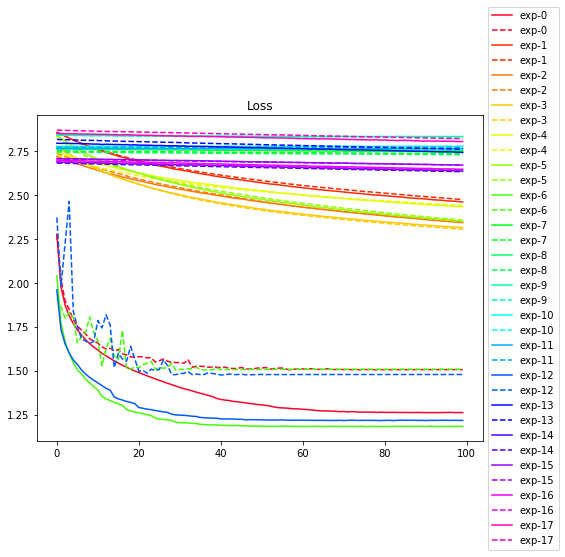

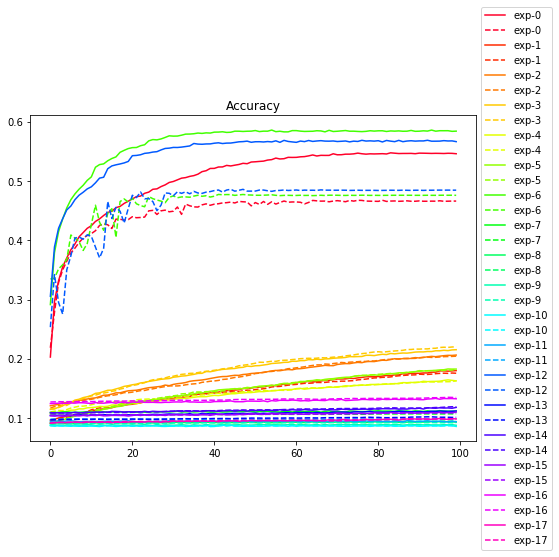

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()